# Place Cell Trials

In [1]:
import vco
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initializing VCO matrix
numrow, numcol = 6, 12
ringsize = 12
minrho = 0.14
rotation_angle = 0
rhos = minrho * (np.sqrt(3)**(np.arange(numrow)))
thetas = np.pi + rotation_angle + 2*np.pi*(np.arange(numcol))/numcol
phz_noise = 0

VCOmat = [[vco.VCO_model(ringsize, rhos[i], thetas[j], phz_noise) \
           for j in range(numcol)] for i in range(numrow)]

In [3]:
full_row = np.full([6,12,4*12**3], np.nan)
row = 3
jdx = 0
for firstcol in range(4):
    for cell1 in range(12):
        for cell2 in range(12):
            for cell3 in range(12):
                full_row[row,firstcol,  jdx] = cell1
                full_row[row,firstcol+4,jdx] = cell2
                full_row[row,firstcol+8,jdx] = cell3
                jdx = jdx + 1

In [4]:
size = 5
num_grids = 4*12**3

grid_outputs = np.zeros([10*size, 10*size, num_grids])
for gc in range(num_grids):
    grid_outputs[:,:,gc], _ = vco.theta_to_hcn(VCOmat,full_row[:,:,gc],size)

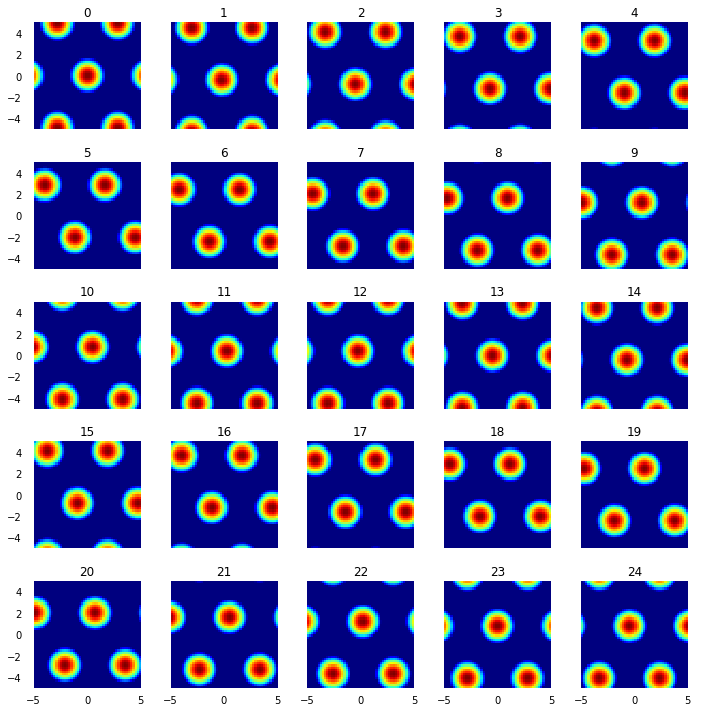

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]

for idx in range(25):
    ax = axes_list.pop(0)
    ax.imshow(grid_outputs[:,:,idx],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

In [6]:
output = np.zeros_like(grid_outputs[:,:,0])

for i in range(grid_outputs.shape[2]):
    output = output + nprd.rand() * grid_outputs[:,:,i]

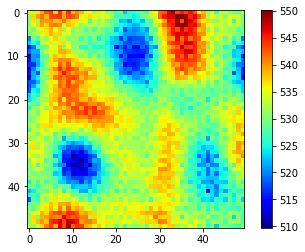

In [7]:
plt.imshow(output,cmap='jet')
plt.colorbar()

In [8]:
num_gc = 25
size   = 5
num_pc = 25

pc_wts = np.zeros([6,12,num_gc,num_pc])
pc_outputs = np.zeros([size*10,size*10,num_pc])
gc_outputs = np.zeros([size*10,size*10,num_gc,num_pc])
gc_to_pc_weights = np.zeros([num_pc,num_gc])
for pc in range(num_pc):
    rd_idx = nprd.randint(0,full_row.shape[2],size=num_gc)
    pc_wts[:,:,:,pc] = full_row[:,:,rd_idx]

    for gc in range(num_gc):
        gc_norm, gc_env = vco.theta_to_hcn(VCOmat, pc_wts[:,:,gc,pc], size)
        gc_outputs[:,:,gc,pc] = gc_norm
        gc_to_pc_weights[pc,gc] = nprd.rand()
        pc_outputs[:,:,pc] = pc_outputs[:,:,pc] + gc_to_pc_weights[pc,gc] * gc_outputs[:,:,gc,pc]

In [9]:
threshold = 0.0
pc_outputs_norm = np.zeros_like(pc_outputs)
for pc in range(num_pc):
    max_env = np.max(pc_outputs[:,:,pc])
    thr_env = pc_outputs[:,:,pc] - threshold*max_env
    thr_env[thr_env<0] = 0
    max_env = np.max(thr_env)
    pc_outputs_norm[:,:,pc] = thr_env / max_env

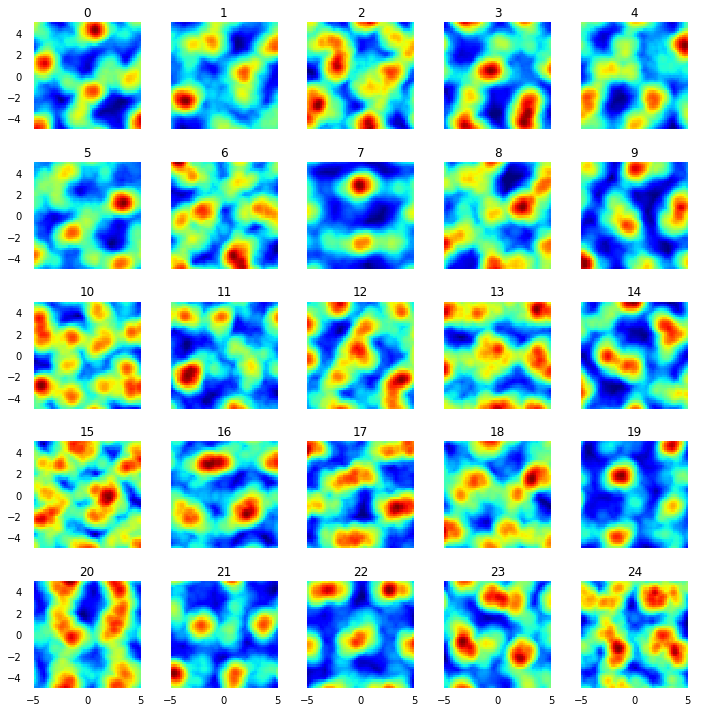

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]

for idx in range(25):
    ax = axes_list.pop(0)
    ax.imshow(pc_outputs_norm[:,:,idx],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

In [11]:
from mpl_toolkits import mplot3d

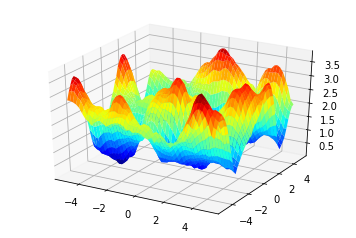

In [12]:
ax = plt.axes(projection='3d')
ss = np.linspace(-size,size,10*size)
X, Y = np.meshgrid(ss,ss)
ax.plot_surface(X,Y,pc_outputs[:,:,13],rstride=1, cstride=1,cmap='jet')